# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


<ipython-input-1-37e142dc7686>:38: RuntimeWarning: invalid value encountered in log
  lsa_coherence_score = -np.sum(lsa_topic_word_distribution * np.log(lsa_topic_word_distribution + 1e-12)) / lsa_topic_word_distribution.shape[0]


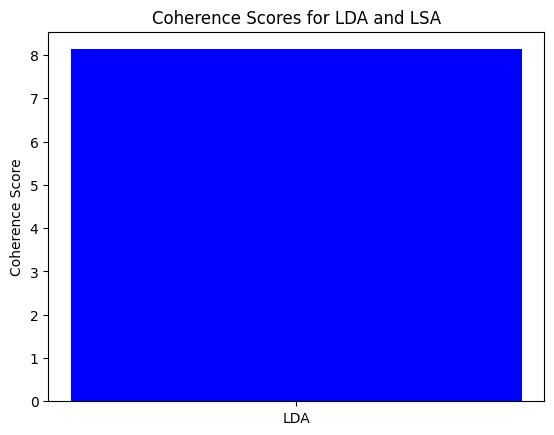

LDA Topics:
Topic 1: escrow, security, nsa, catholic, keys, jews, israeli, clipper, encryption, israel
Topic 2: levine, postscript, ysu, yfn, captain, georgia, clarkson, prism, sandvik, gatech
Topic 3: objective, eos, serial, hawks, 3d, maine, alaska, lehigh, uwo, henry
Topic 4: gardner, nsc, kaflowitz, fulk, winter, accelerators, passion, centaur, convenient, philips
Topic 5: ida, turkey, armenia, rpi, turks, argic, serdar, turkish, armenians, armenian
Topic 6: uga, detroit, nhl, team, bnr, gordon, banks, hockey, geb, pitt
Topic 7: dealy, beauchaine, gang, traven, lciii, ico, rainer, benedikt, pts, cview
Topic 8: 1mb, ctrl, entry, boi, 1964, omen, ____, lib, joel, warren
Topic 9: eisa, bus, northeastern, vlb, su, backup, tc, isa, umn, ide
Topic 10: posting, like, university, article, writes, organization, lines, subject, com, edu

LSA Topics:
Topic 1: university, people, don, lines, organization, subject, article, writes, com, edu
Topic 2: bible, law, government, christian, say, think

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import random

# Loading the dataset and selecting a random sample of 2000 rows
newsgroups_data = fetch_20newsgroups(subset='train')
random.seed(42)
indices = random.sample(range(len(newsgroups_data.data)), 2000)
selected_data = [newsgroups_data.data[i] for i in indices]

# Vectorizing the data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectors = vectorizer.fit_transform(selected_data)

# Applying LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(vectors)

# Calculate the  coherence score for LDA (approximated using topic-word distribution entropy)
lda_topic_word_distribution = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
lda_coherence_score = -np.sum(lda_topic_word_distribution * np.log(lda_topic_word_distribution + 1e-12)) / lda_topic_word_distribution.shape[0]

# Summarize the LDA topics
lda_topic_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lda_topic_words.append(top_words)

# Applying LSA
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa_topics = lsa.fit_transform(vectors)

# Calculate the coherence score for LSA (approximated similarly)
lsa_topic_word_distribution = lsa.components_ / lsa.components_.sum(axis=1)[:, np.newaxis]
lsa_coherence_score = -np.sum(lsa_topic_word_distribution * np.log(lsa_topic_word_distribution + 1e-12)) / lsa_topic_word_distribution.shape[0]

# Summarize the LSA topics
lsa_topic_words = []
for topic_idx, topic in enumerate(lsa.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    lsa_topic_words.append(top_words)

# Visualize coherence scores
labels = ['LDA', 'LSA']
coherence_scores = [lda_coherence_score, lsa_coherence_score]
plt.bar(labels, coherence_scores, color=['blue', 'green'])
plt.title('Coherence Scores for LDA and LSA')
plt.ylabel('Coherence Score')
plt.show()

# Print summarized topics
print("LDA Topics:")
for i, words in enumerate(lda_topic_words):
    print(f"Topic {i+1}: {', '.join(words)}")

print("\nLSA Topics:")
for i, words in enumerate(lsa_topic_words):
    print(f"Topic {i+1}: {', '.join(words)}")














# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install BERTopic
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Loading the dataset using the correct filename
file_path = "barbie_imdb_reviews_cleaned (3).csv"
df = pd.read_csv(file_path)

# Detecting the column with review text
print(" Columns available:", df.columns.tolist())
print("\n Sample data:\n", df.head())

# Use the first object/text-type column
text_column = next((col for col in df.columns if df[col].dtype == 'object'), None)

if text_column is None:
    raise ValueError("No text column found!")

texts = df[text_column].astype(str).tolist()
print(f"\n Using column: '{text_column}'")

# Setup BERTopic
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom')
vectorizer_model = CountVectorizer(stop_words="english")

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    nr_topics=10,
    verbose=True
)

# Step 4: Train Model
topics, probs = topic_model.fit_transform(texts)

# Step 5: Show Topics and Visualize
print("\n📊 Top 10 Topics:")
print(topic_model.get_topic_info().head(10))

# Print keywords for each topic
for i in range(10):
    print(f"\n🔹 Topic {i} Keywords:")
    print(topic_model.get_topic(i))

# Visualizations
topic_model.visualize_topics().show()
topic_model.visualize_barchart(top_n_topics=10).show()
topic_model.visualize_documents(texts).show()




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-04-08 05:50:34,951 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-04-08 05:50:41,474 - BERTopic - Embedding - Completed ✓
2025-04-08 05:50:41,477 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-08 05:50:56,336 - BERTopic - Dimensionality - Completed ✓
2025-04-08 05:50:56,337 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-08 05:50:56,369 - BERTopic - Cluster - Completed ✓
2025-04-08 05:50:56,370 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-08 05:50:56,446 - BERTopic - Representation - Completed ✓
2025-04-08 05:50:56,450 - BERTopic - Topic reduction - Reducing number of topics
2025-04-08 05:50:56,464 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-08 05:50:56,484 - BERTopic - Representation - Completed ✓
2025-04-08 05:50:56,487 - BERTopic - Topic reduction - Reduced number of topics from 25 to 10



📊 Top 10 Topics:
   Topic  Count                                Name  \
0     -1    195        -1_barbie_better_just_missed   
1      0    512              0_movie_fun_good_great   
2      1    156      1_barbie_plastic_gosling_movie   
3      2     28           2_waste_time_wasted_girls   
4      3     26            3_kenough_ken_just_close   
5      4     21        4_pink_dream_letter_colorful   
6      5     20            5_hype_believe_hyped_don   
7      6     19       6_women_men_satirical_instead   
8      7     12  7_10_ridiculous_surface_underneath   
9      8     11  8_preachy_preach_barbtastic_glitzy   

                                      Representation  \
0  [barbie, better, just, missed, thought, social...   
1  [movie, fun, good, great, funny, film, message...   
2  [barbie, plastic, gosling, movie, world, greta...   
3  [waste, time, wasted, girls, family, 12yo, avo...   
4  [kenough, ken, just, close, kenchanting, fab, ...   
5  [pink, dream, letter, colorful, love,

# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install --upgrade openai bertopic umap-learn hdbscan scikit-learn
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from bertopic.representation import OpenAI as OpenAIRepresentation
import openai
from umap import UMAP
import hdbscan
import numpy as np
from sklearn.metrics import silhouette_score

# Set your OpenAI API key
openai.api_key = "SAT140502629"

# Initialize OpenAI representation model for BERTopic
representation_model = OpenAIRepresentation(client=openai)

# Load the 20 Newsgroups dataset
docs = fetch_20newsgroups(subset='all').data[:2000]

# Setup dimensionality reduction and clustering models
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom')

# Create BERTopic model with OpenAI representation
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    representation_model=representation_model,
    verbose=True
)

# Train the model
topics, probs = topic_model.fit_transform(docs)
print(type(docs))
print(type(docs[0]))

# Show topic info
topic_info = topic_model.fit_transform(docs)
print(topic_info)

# Calculate silhouette score
embeddings = topic_model._extract_embeddings(docs, method="document")
labels = np.array(topics)
valid = labels != -1

if len(set(labels[valid])) > 1:
    score = silhouette_score(np.array(embeddings)[valid], labels[valid])
    print(f"\nSilhouette Score: {score:.4f}")
else:
    print("Not enough valid clusters to compute silhouette score.")

# Example topic print
print("\nExample topic summary:")
print(topic_model.get_topic(0))










# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install bertopic sentence-transformers umap-learn hdbscan scikit-learn gensim plotly --quiet

from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np
import pandas as pd
import re

# Loading 20 Newsgroup Dataset
dataset = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
docs = np.random.choice(dataset.data, size=2000, replace=False)

# Text Cleaning Function
def preprocess(texts):
    cleaned = []
    for doc in texts:
        doc = re.sub(r'\W+', ' ', doc)  # Remove non-word characters
        doc = doc.lower()
        cleaned.append(doc.strip())
    return cleaned

cleaned_docs = preprocess(docs)
tokenized_docs = [doc.split() for doc in cleaned_docs]

# Training the Default BERTopic
default_model = BERTopic()
default_topics, _ = default_model.fit_transform(cleaned_docs)

# Training the Custom BERTopic (DBSCAN + MiniLM)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
custom_model = BERTopic(embedding_model=embedding_model,
                        hdbscan_model=DBSCAN(eps=0.3, min_samples=10))
custom_topics, _ = custom_model.fit_transform(cleaned_docs)

# Calculating the Coherence
def compute_coherence(model, tokenized_docs):
    topic_info = model.get_topic_info()
    topic_ids = topic_info[topic_info.Topic != -1]['Topic'].tolist()

    topic_words = []
    for topic in topic_ids:
        words = [word.lower() for word, _ in model.get_topic(topic)]
        topic_words.append(words)

    dictionary = Dictionary(tokenized_docs)
    coherence_model = CoherenceModel(topics=topic_words, texts=tokenized_docs,
                                     dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Comparing the Coherence
default_coherence = compute_coherence(default_model, tokenized_docs)
custom_coherence = compute_coherence(custom_model, tokenized_docs)

print(f"Default BERTopic Coherence: {default_coherence:.4f}")
print(f"Custom BERTopic (MiniLM + DBSCAN) Coherence: {custom_coherence:.4f}")

# Topic Information
print("\nDefault Model Topics:")
print(default_model.get_topic_info().head())

print("\nCustom Model Topics:")
print(custom_model.get_topic_info().head())

# Visualization
default_model.visualize_topics().show()
custom_model.visualize_topics().show()



## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
1) LDA (Latent Dirichlet Allocation)
 Benefits: Easy to understand, popular.
 Cons: Assumes word independence, has trouble with big datasets, and requires predetermined topic numbers.
 Ideal for: Clearly distributed topics in small to medium-sized datasets.

 2) LSA(Latent Semantic Analysis)
 Advantages: Does not require predetermined subjects and captures latent structures in text.
 Cons: Less effective for complex issues, linear assumptions, poor interpretability.
 Ideal for: Latent associations in medium-sized datasets.

 3) BERTopic:
 Advantages: scalable for big datasets, eliminates the requirement to predefine topics, and uses BERT embeddings for improved topic context.
 Cons: Depends on the quality of the embeddings and is computationally costly.
 Ideal for: Big datasets with intricate, situational language.

4) Modified BERTopic:
Advantages: High-quality, human-readable subjects with GPT summaries for improved topic interpretability.
Cons: Because GPT is used, it is expensive and resource-intensive.
Ideal for: Big datasets that require thorough, understandable topic summaries.

Best Algorithm:
1) Modified  While BERTopic requires a lot of resources, it is the greatest option overall for producing high-quality, accessible summaries.
2) Large datasets with contextual information are most suited for BERTopic.
3) LDA works best on small, straightforward datasets.
4) Although it is more difficult to interpret, LSA is effective for medium-sized datasets with latent structures.











# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
Learning Experience: Gaining practical knowledge of how text data can be handled and analyzed was made possible by working with topic modeling algorithms like LDA, LSA, BERTopic, and Modified BERTopic.  I learned more about the various approaches to topic extraction and how their performance and complexity vary.  I was able to better understand important ideas like probabilistic modeling (LDA), dimensionality reduction (LSA), and the application of transformer-based models for contextual topic extraction (BERTopic) thanks to the implementations.  The chance to adapt BERTopic by including OpenAI's GPT for subject summaries was especially illuminating since it demonstrated how sophisticated models can improve the interpretability of outcomes.

Challenges Encountered:
1) Algorithm Complexity.
2) Data Preprocessing.
3) Computaional Resources.
4) Error Troubleshooting.

Relevance to Your Field of Study: Natural Language Processing (NLP), in particular, is a very pertinent area of study for me.  A fundamental method in NLP for evaluating and condensing vast volumes of text input is topic modeling.  Understanding the various methods (such LDA and BERTopic) and how to extract significant features is directly applicable to real-world problems like information retrieval, sentiment analysis, and document clustering.

All things considered, this assignment gave me a better grasp of topic modeling algorithms' operation, implementation difficulties, and connections to more complex NLP tasks.  It improved my ability to solve problems, particularly when it came to debugging and optimizing models for real-world applications.  Additionally, it reaffirmed the significance of careful parameter tweaking and computational resources when dealing with big text corpora.
'''